<a href="https://colab.research.google.com/github/01-Projects-In-Python/Project-GrossProfitPredition-AdvertisingChannel/blob/main/Code_Project-GrossProfitPredition-AdvertisingChannel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GROSS PROFIT PREDITION - ADVERTISING CHANNELS:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv('Advertise.csv', sep = ',', na_values = 'nan', thousands = '.')

In [ ]:
df.head()

,Channel,Date,Ad Spend,Impressions,Clicks,Sales Transactions,Gross Profit
0,Facebook,05/07/2021,$720,"13,231",8,1,$50
1,Google,05/07/2021,"$1,328","22,413",208,35,"$1,750"
2,LinkedIn,05/07/2021,"$1,191","26,744",121,8,$500
3,Reddit,05/07/2021,$139,"3,136",30,4,$200
4,Facebook,06/07/2021,$742,"13,093",10,1,$50


In [ ]:
df.shape

(448, 7)

In [ ]:
df.isnull().sum()

Channel               0
Date                  0
Ad Spend              0
Impressions           0
Clicks                0
Sales Transactions    0
Gross Profit          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Channel             448 non-null    object
 1   Date                448 non-null    object
 2   Ad Spend            448 non-null    object
 3   Impressions         448 non-null    object
 4   Clicks              448 non-null    int64 
 5   Sales Transactions  448 non-null    int64 
 6   Gross Profit        448 non-null    object
dtypes: int64(2), object(5)
memory usage: 24.6+ KB


In [ ]:
list_chage = ['Ad Spend', 'Gross Profit']

In [ ]:
for x in list_split:
    df[x] = df[x].str.replace('$', '')

In [ ]:
df.head()

,Channel,Date,Ad Spend,Impressions,Clicks,Sales Transactions,Gross Profit
0,Facebook,05/07/2021,720,"13,231",8,1,50
1,Google,05/07/2021,"1,328","22,413",208,35,"1,750"
2,LinkedIn,05/07/2021,"1,191","26,744",121,8,500
3,Reddit,05/07/2021,139,"3,136",30,4,200
4,Facebook,06/07/2021,742,"13,093",10,1,50


In [ ]:
df['Ad Spend'] = pd.to_numeric(df['Ad Spend'].str.replace(',', ''), errors='coerce').astype(int)

In [ ]:
df['Impressions'] = pd.to_numeric(df['Impressions'].str.replace(',', ''), errors='coerce').astype(int)

In [ ]:
df['Gross Profit'] = pd.to_numeric(df['Gross Profit'].str.replace(',', ''), errors='coerce').astype(int)

In [ ]:
df.head()

,Channel,Date,Ad Spend,Impressions,Clicks,Sales Transactions,Gross Profit
0,Facebook,05/07/2021,720,13231,8,1,50
1,Google,05/07/2021,1328,22413,208,35,1750
2,LinkedIn,05/07/2021,1191,26744,121,8,500
3,Reddit,05/07/2021,139,3136,30,4,200
4,Facebook,06/07/2021,742,13093,10,1,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Channel             448 non-null    object
 1   Date                448 non-null    object
 2   Ad Spend            448 non-null    int32 
 3   Impressions         448 non-null    int32 
 4   Clicks              448 non-null    int64 
 5   Sales Transactions  448 non-null    int64 
 6   Gross Profit        448 non-null    int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 19.4+ KB


- Conduct a descriptive analysis, including by channel, by (1) day, by (2) week, and by (3) month. Make initial conclusions accordingly. Note to use graphs in your analysis.

In [ ]:
# Transforming the data column
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2021-05-07
1     2021-05-07
2     2021-05-07
3     2021-05-07
4     2021-06-07
         ...    
443   2021-10-23
444   2021-10-24
445   2021-10-24
446   2021-10-24
447   2021-10-24
Name: Date, Length: 448, dtype: datetime64[ns]

In [ ]:
# Indexing the date
indexed_df = df.set_index('Date')
indexed_df

,Channel,Ad Spend,Impressions,Clicks,Sales Transactions,Gross Profit
Date,,,,,,
2021-05-07,Facebook,720,13231,8,1,50
2021-05-07,Google,1328,22413,208,35,1750
2021-05-07,LinkedIn,1191,26744,121,8,500
2021-05-07,Reddit,139,3136,30,4,200
2021-06-07,Facebook,742,13093,10,1,50
...,...,...,...,...,...,...
2021-10-23,Reddit,153,2742,38,5,300
2021-10-24,Facebook,735,13381,220,35,1800
2021-10-24,Google,1508,25193,463,56,3100


Text(0.5, 1.0, 'Profit gross margin by month')

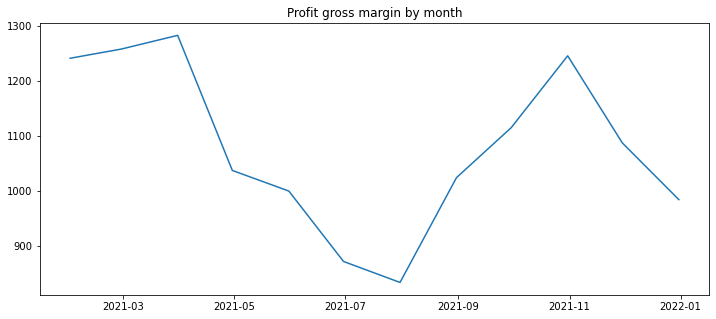

In [ ]:
# Analysis by month
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(indexed_df['Gross Profit'].resample('M').mean())
plt.title('Profit gross margin by month')

- In this graph we can see that the gross profit is higher between march and april and between october and november

Text(0.5, 1.0, 'Gross profit by week')

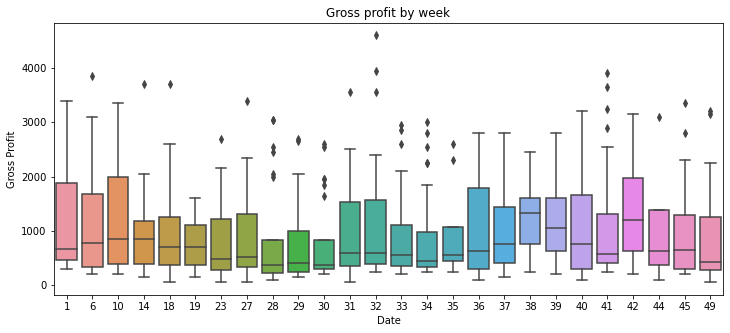

In [ ]:
# Analysis by week
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(indexed_df['Gross Profit'].index.week, indexed_df['Gross Profit'], ax=ax)
plt.title('Gross profit by week')

- The gross profit is higher in the week 37 and in the week 42.

Text(0.5, 1.0, 'Gross profit by day of the month')

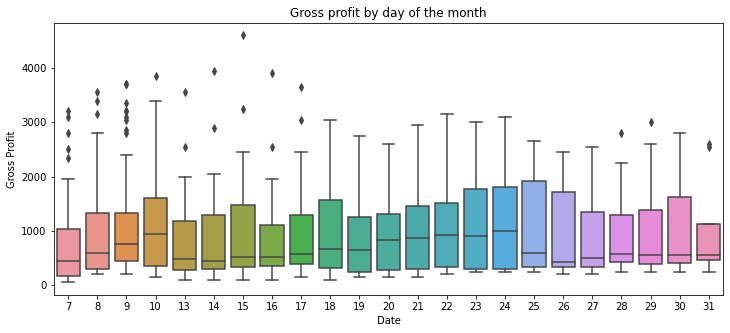

In [ ]:
# Analysis by day of the month
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(indexed_df['Gross Profit'].index.day, indexed_df['Gross Profit'], ax=ax)
plt.title('Gross profit by day of the month')

- Looking deeply in each day, we can see that the median is higher between the day 22 to 24 of each month

Text(0.5, 1.0, 'Gross profit by channel')

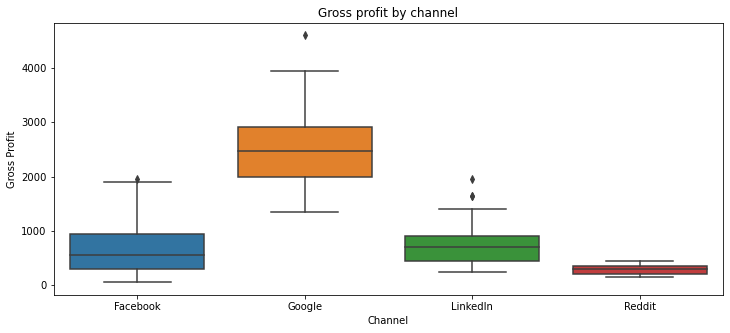

In [ ]:
# Analysis by channel:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df['Channel'], df['Gross Profit'], ax=ax)
plt.title('Gross profit by channel')

- Performing the analysis based on channels, we can see that the gross margin received is much higher through Google than through the other channels

- Conduct predictive analyses to predict gross profit for the next day, next week, and next month.

In [ ]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [ ]:
df = df.rename(columns = {'Gross Profit':'Gross_Profit', 'Sales Transactions':'Sales_Transactions'})

In [ ]:
# Selecting the most important features of the dataframe through the Random Forest Technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
y_col = 'Gross_Profit'

In [ ]:
y = df[y_col]

In [ ]:
X_categorical = df.select_dtypes(include=['object'])

In [ ]:
X_numerical = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
X_encoded = encoder.fit_transform(X_categorical)

In [ ]:
X = np.concatenate((X_numerical, X_encoded.toarray()), axis=1)

In [ ]:
X = pd.DataFrame(X, columns=list(X_numerical.columns) + list(encoder.get_feature_names(X_categorical.columns)))

In [ ]:
forest = RandomForestRegressor(n_estimators = 510, random_state = 1)

In [ ]:
forest.fit(X, y)

RandomForestRegressor(n_estimators=510, random_state=1)

In [ ]:
rf_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_})
rf_feature_importance.sort_values(by = 'importance', ascending = False)

,feature,importance
1,Sales_Transactions,0.982921
0,Clicks,0.010882
2,day,0.003405
3,month,0.002376
6,Channel_Google,0.000171
5,Channel_Facebook,0.000115
7,Channel_LinkedIn,0.000106
8,Channel_Reddit,0.000024
4,year,0.000000


In [ ]:
# filtering out features with importance < 0.001
rf_features_to_use = rf_feature_importance[rf_feature_importance['importance'] >= 0.001]['feature'].to_list()
rf_features_to_use

['Clicks', 'Sales_Transactions', 'day', 'month']

- Creating the model based on the important variables of Random Forest

In [ ]:
mlr_model = LinearRegression()
mlr_model.fit(df[['Clicks', 'Sales_Transactions', 'day', 'month']], df['Gross_Profit'])

LinearRegression()

In [ ]:
# Creating the predicted mpg variable and the error variable in the dataset
df['price_predicted']  = mlr_model.predict(df[['Clicks', 'Sales_Transactions', 'day', 'month']])
df['error'] = (df['price_predicted'] - df['Gross_Profit'])**2

In [ ]:
# Calculating the Mean Squared Error (MSE) of the model
MSE_mlr = df['error'].mean()
MSE_mlr

15580.626587498755

In [ ]:
mlr_Rsq = mlr_model.score(df[['Clicks', 'Sales_Transactions', 'day', 'month']], df['Gross_Profit'])
mlr_Rsq

0.9831304003017914

In [ ]:
# Detailed information of the MLR model:

mlr = smf.ols(formula = 'Gross_Profit ~ Clicks +Sales_Transactions+day +month', data = df).fit()
mlr.params
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:           Gross_Profit   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     6454.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:09:45   Log-Likelihood:                -2798.1
No. Observations:                 448   AIC:                             5606.
Df Residuals:                     443   BIC:                             5627.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             44.7188     23

---> Multiple Linear Regression Model results:

The p- values with the lowest statistical significance are day (0.887), followed by month (0.744) and clicks (0.0.595)
The R-square of the Multiple Linear Regression Model is 0.98.

In [ ]:
# Splitting the data
df.columns

Index(['Channel', 'Date', 'Ad Spend', 'Impressions', 'Clicks',
       'Sales_Transactions', 'Gross_Profit', 'day', 'month', 'year',
       'price_predicted', 'error'],
      dtype='object')

In [ ]:
# Deleting the features created
df.drop(columns = ["error", "price_predicted"], inplace = True)

In [ ]:
df.head()

,Channel,Date,Ad Spend,Impressions,Clicks,Sales_Transactions,Gross_Profit,day,month,year
0,Facebook,2021-05-07,720,13231,8,1,50,7,5,2021
1,Google,2021-05-07,1328,22413,208,35,1750,7,5,2021
2,LinkedIn,2021-05-07,1191,26744,121,8,500,7,5,2021
3,Reddit,2021-05-07,139,3136,30,4,200,7,5,2021
4,Facebook,2021-06-07,742,13093,10,1,50,7,6,2021


In [ ]:
xbase = df[['Clicks', 'Sales_Transactions', 'day', 'month']]
y = df[['Gross_Profit']]

In [ ]:
xbase_train, xbase_test, y_train, y_test = train_test_split(xbase, y, random_state = 101, train_size = 0.80)

In [ ]:
# Validating the shape:
xbase_train.shape, xbase_test.shape, y_train.shape, y_test.shape

((358, 4), (90, 4), (358, 1), (90, 1))

In [ ]:
xbase_train.head()

,Clicks,Sales_Transactions,day,month
64,27,4,21,7
194,273,16,22,8
447,45,4,24,10
288,66,9,15,9
143,31,3,8,9


In [ ]:
#Checking the performance:
mlr_model = LinearRegression()
mlr_model.fit(xbase_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = mlr_model.predict(xbase_train)

In [ ]:
y_pred = mlr_model.predict(xbase_test)
xbase_test['y_pred'] = y_pred
xbase_test.head()

,Clicks,Sales_Transactions,day,month,y_pred
12,10,1,7,8,94.805489
19,48,5,7,9,314.425349
259,31,4,9,7,259.076891
289,245,38,15,9,2126.511098
181,230,39,19,8,2181.608511


In [ ]:
y_train.shape

(358, 1)

In [ ]:
xbase_test = xbase_test.drop(['y_pred'], axis = 1)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R-Squared:", mlr_model.score(xbase_train, y_train))

Mean Absolute Error (MAE): 85.64998139230838
Mean Squared Error (MSE): 16519.557090232087
Root Mean Squared Error (RMSE): 128.52842911290904
R-Squared: 0.9823920731621792


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared:", mlr_model.score(xbase_test, y_test))

Mean Absolute Error (MAE): 75.90338384502736
Mean Squared Error (MSE): 12003.181322693272
Root Mean Squared Error (RMSE): 109.55903122378032
R-Squared: 0.9860488006563626


---> Checking the performance of the Multiple Linear Model on the train vs the test, we can see that the model performed a little bit better in the test but it is overfitted, reason why the model needs to be regularized, so we will apply the Lasso technique:

In [ ]:
lasso = Lasso(alpha = 0.1)
lasso.fit(xbase_train, y_train)

Lasso(alpha=0.1)

In [ ]:
ypred_lasso = lasso.predict(xbase_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, ypred_lasso))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, ypred_lasso))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ypred_lasso)))
print("R-Squared:", lasso.score(xbase_train, y_train))

Mean Absolute Error (MAE): 75.89890544320505
Mean Squared Error (MSE): 12002.203925006608
Root Mean Squared Error (RMSE): 109.55457053453593
R-Squared: 0.9823920707001983


The regularization did not generate a significant change in the model performance, reason why for further analysis we will need to check if between the variables there is multicollinearity that is affecting the overall performance.

- Conduct analysis of variance by channel, by day, by week and by month to find out which channel gives high sales and profit.

In [ ]:
to_cat = ['day', 'month', 'year']

In [ ]:
for x in to_cat:
    df[x] = df[x].astype('category', copy = False)

In [ ]:
aov_v = {}
for x in to_cat:
    model = ols('Gross_Profit ~ Channel:{}'.format(x), data = df).fit()
    aov_v[x] = sm.stats.anova_lm(model, typ=2)

aov_vasd = []
for k, v in aov_v.items():
    df_aov_vasd = pd.DataFrame(v)
    df_aov_vasd.index.name = k
    aov_vasd.append(df_aov_vasd)

aov_vasd_df = pd.concat(aov_vasd)
display(aov_vasd_df)

,sum_sq,df,F,PR(>F)
Channel:day,3.482935e+08,91.0,20.810072,2.235705e-99
Residual,6.547573e+07,356.0,NaN,NaN
Channel:month,3.506585e+08,47.0,47.287170,4.548124e-135
Residual,6.311072e+07,400.0,NaN,NaN
Channel:year,3.297413e+08,3.0,580.779843,3.013216e-153
Residual,8.402790e+07,444.0,NaN,NaN


In [ ]:
labels = df['Channel']

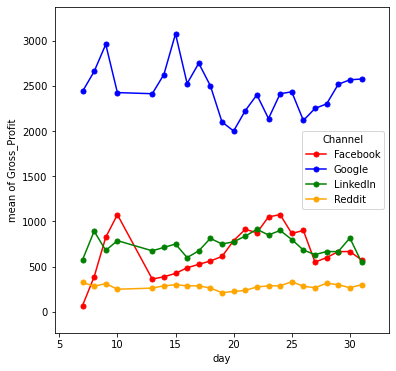

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=df['day'], trace=df['Channel'], response=df['Gross_Profit'], colors=["red", "blue", "green", "orange"], ms=10, ax=ax)

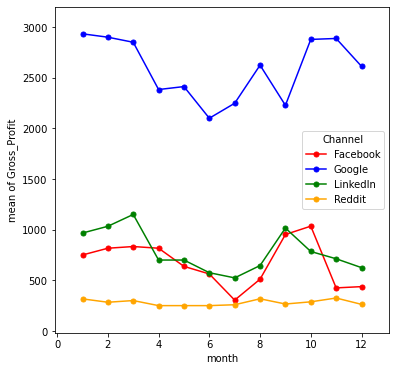

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=df['month'], trace=df['Channel'], response=df['Gross_Profit'], colors=["red", "blue", "green", "orange"], ms=10, ax=ax)

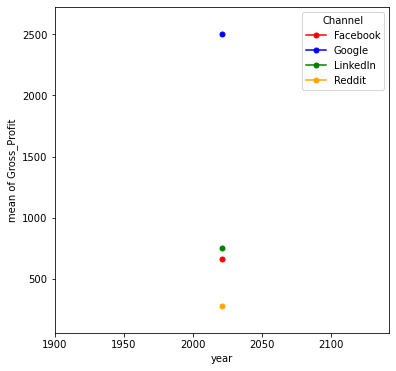

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=df['year'], trace=df['Channel'], response=df['Gross_Profit'], colors=["red", "blue", "green", "orange"], ms=10, ax=ax)

- Based on the predictive analytics and analysis of variance, give business recommendations to the company about how to spend on advertisement effectively to improve the business performance of their company.

Based on the analysis performed we could see:
1. The interaction between day, month, and year and the channel variables does not have an effect on the gross profit total, which means independent of the date that the ad is posted, the gross profit gained from the channels will be similar throughout the different dates.
2. The variables 'Clicks', 'Sales_Transactions', 'day', and 'month' are the variables that can predict the gross profit, which means these variables are going to determine the amount of income that the company received.
3. The recommendation for the company will be to invest in advertising on Google, we can see that their average during the year has been higher than the other channel (Facebook, LinkedIn, and Reddit)
4. This analysis may have some bias due to the analysis of the normality was not performed (Shapiro and QQ Plot).